# The Sparks Foundation
## Computer Vision & IoT
### Task 1: Object Detection
### Name: Nandita Attawar

##### Import the libraries  

In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

#### The pretrained tensorflow model and  configuration

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
# The text file named Labels includes coco dataset Labels containing 80 classes.
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip("\n").split('\n')

In [6]:
print(classLabels) #The 80 classes in the Labels file.

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels)) #The length of the classes "80".

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)# for scaling we are converting 255/2=127.5
model.setInputMean((127.5,127.5,127.5))#mobilenet=[-1,1]
model.setInputSwapRB(True)

<dnn_Model 0000018B76BC7470>

#### Detecting objects in an Image 

In [9]:
img = cv2.imread('image_5.jpg') #reading the image.

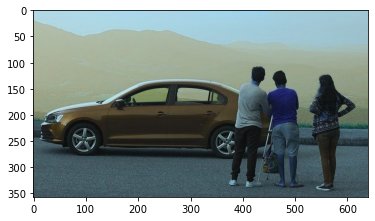

In [10]:
plt.imshow(img) #displaying the image in BGR form.

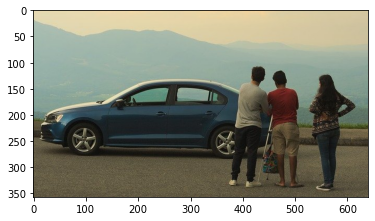

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converting the image to RGB.

In [12]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5) #Here the accuracy is set to 50%.

In [13]:
print(ClassIndex) #prints the lists of object labels present.

[1 1 1 3]


In [14]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
    #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.rectangle(img,boxes,(225,0,0),2)
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontscale=font_scale,color=(0,0,0),thickness=1)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+10), font, fontScale=font_scale, color=(0,255,0),thickness=2)

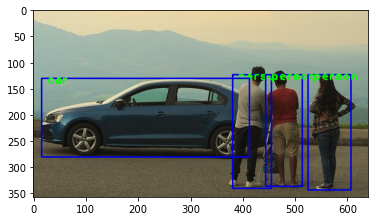

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #displays image with detected objects.

#### Detecting objects in a video

In [16]:
cap = cv2.VideoCapture("video.mp4") #captures the image from the video

# to check if the video is opened properly or not
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece , bbox = model.detect(frame,confThreshold = 0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color = (0,255,0),thickness = 3 )
                
                cv2.imshow('Object Detection Tutorial',frame)
                
                if cv2.waitKey(2) & 0xFF == ord('q'):
                    break
                    
                    cap.release()
                    cv2.destroyAllWindows()

[10 10  3  3  6  3]
[10 10  3  3  6  3]
[10 10  3  3  6  3]
[10 10  3  3  6  3]
[10 10  3  3  6  3]
[10 10  3  3  6  3]
[10 10  3  3  3  6]
[10 10  3  3  3  6]
[10 10  3  3  3  6  4]
[10 10  3  3  6  3  4]
[10 10  3  3  3  6  4]
[10 10  3  3  3  6  1  4]
[10 10  3  3  3  1  6  4]
[10 10  3  3  3  4  1  6]
[10 10  3  3  3  4  1  1]
[10 10  3  3  1  3  4  1]
[10 10  3  1  3  4  3  3  6  1]
[10 10  3  3  4  1  3  8  6  1]
[10 10  3  4  6  8  3  1  3]
[10 10  3  4  1  3  6  8  3  3]
[10 10  3  3  1  4  3]
[10 10  3  1  3  4  3  1]
[10 10  3  3  3  1  3  4  1]
[10 10  3  1  4  3  3  1  3]
[10 10  3  3  3  4  1  1]
[10 10  3  4  3  3  1  1  3]
[10 10  3  3  4  1  3  1  6  1]
[10 10  4  3  1  3  3  6]
[10 10  3  1  4  3  3  6]
[10 10  3  6  1  3  1  3  4  1]
[10 10  3  3  1  1  6  4  3]
[10 10  1  1  3  1  6  3  3]
[10 10  3  4  3  3  3  1  6]
[10 10  3  3  3  1  4  6]
[10 10  4  1  3  3  3  1  6  1  3  1]
[10 10  3  1  3  3  4  6  1  3  1]
[10 10  1  3  3  1  1  3  4  1  1  6  1]
[10 10  3  

KeyboardInterrupt: 